[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jesherjoshua/dsc-ml-workshop/blob/mothership/Hands-on.ipynb)


# **Salary Prediction** 🤑


# Imports


In [96]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# STEP-1: Load Data ⬇️


In [ ]:
!git clone https://github.com/jesherjoshua/dsc-datasets.git

In [30]:
df = pd.read_csv("./Salary_Data.csv")


In [36]:
type(df)


pandas.core.frame.DataFrame

In [31]:
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# STEP-2: Clean and Explore 🧹


In [32]:
df.shape


(30, 2)

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [35]:
df.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

In [34]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [38]:
df.nunique()


YearsExperience    28
Salary             30
dtype: int64

<AxesSubplot:>

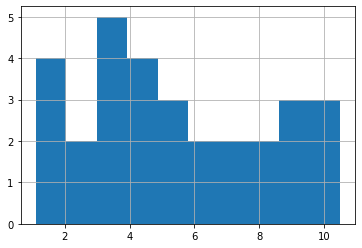

In [45]:
df.YearsExperience.hist()


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

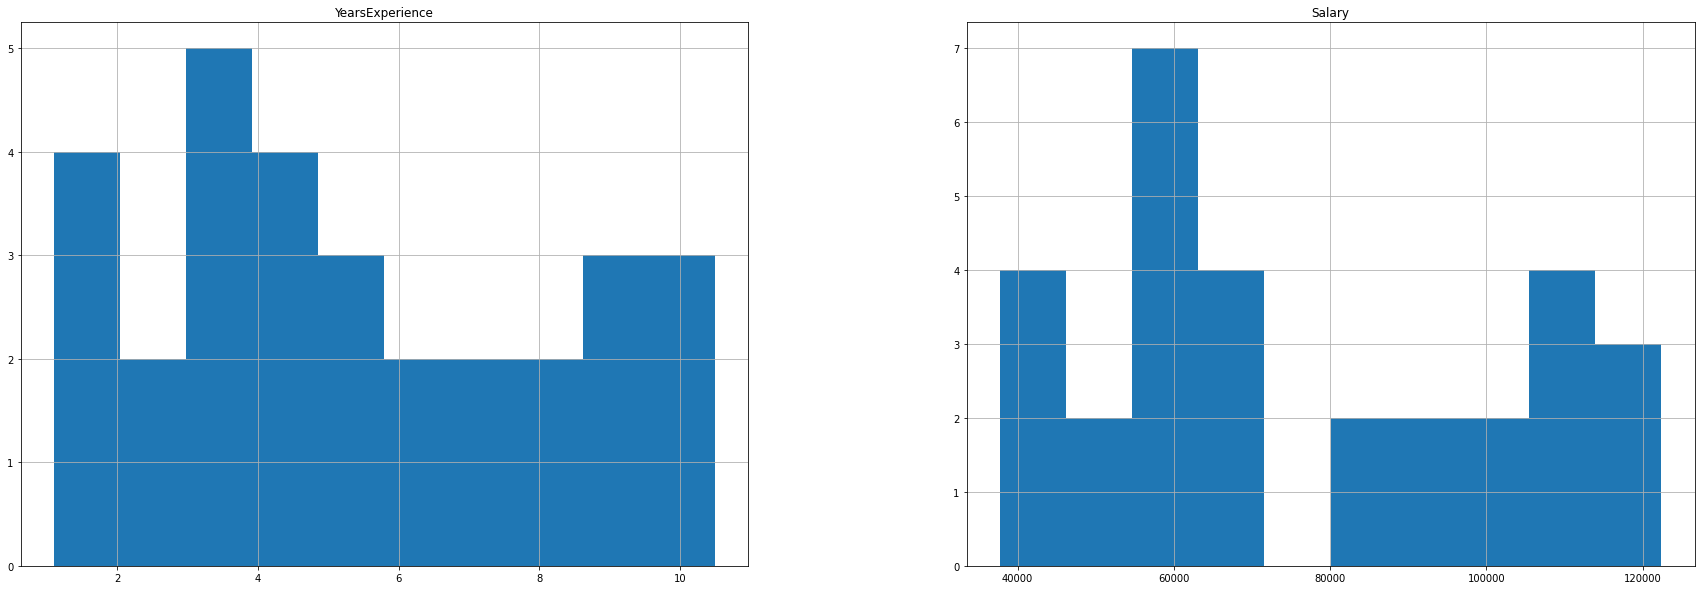

In [60]:
df.hist(figsize=(30, 10))  # width,height


<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

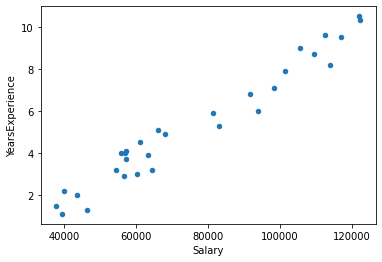

In [63]:
df.plot.scatter(x="Salary", y="YearsExperience")


<AxesSubplot:>

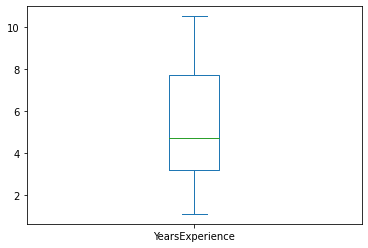

In [62]:
df.YearsExperience.plot.box()


<AxesSubplot:>

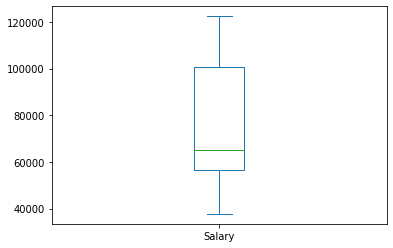

In [64]:
df.Salary.plot.box()


<AxesSubplot:>

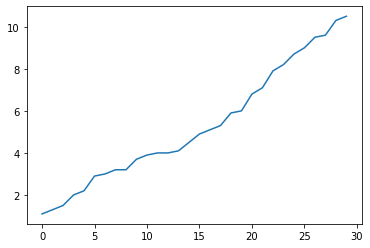

In [67]:
df.YearsExperience.plot()


<AxesSubplot:>

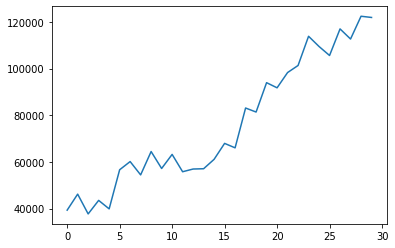

In [68]:
df.Salary.plot()


# STEP-3: Encode and Transform


In [112]:
x_train, x_test, y_train, y_test = train_test_split(
    df.YearsExperience.to_numpy(), df.Salary.to_numpy(), test_size=0.3
)


# STEP-4: Train 🏋️‍♂️


In [113]:
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train)
lr.predict(x_test.reshape(-1, 1))


array([ 34659.54779309,  63644.59236332,  89731.13247652, 108088.327371  ,
        75238.61019141,  67509.26497268, 110986.83182802,  36591.88409777,
        82001.78725779])

# STEP-5: Evaluate 🕵️‍♂️


In [115]:
print("R2 Score:", lr.score(x_test.reshape(-1, 1), y_test))
print("MSE: ", mean_squared_error(y_test, lr.predict(x_test.reshape(-1, 1))))
print("MAE: ", mean_absolute_error(y_test, lr.predict(x_test.reshape(-1, 1))))


R2 Score: 0.9193056275411096
MSE:  48615733.25296005
MAE:  6200.044441826513


Text(0.5, 1.0, 'Train-set')

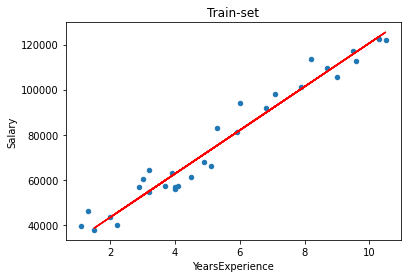

In [116]:
df.plot.scatter(x="YearsExperience",y="Salary")
plt.plot(x_train,lr.predict(x_train.reshape(-1,1)),color='red')
plt.title("Train-set")

Text(0.5, 1.0, 'Test-set')

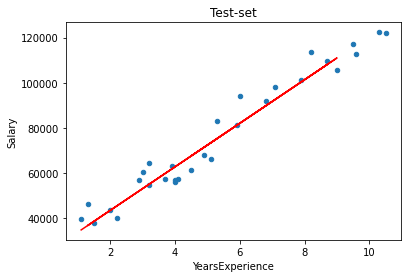

In [117]:
df.plot.scatter(x="YearsExperience",y="Salary")
plt.plot(x_test,lr.predict(x_test.reshape(-1,1)),color='red')
plt.title("Test-set")

# STEP-6: Deploy 🚀


In [97]:
pickle.dump(lr, open("lr.pkl", "wb"))


In [98]:
model = pickle.load(open("lr.pkl", "rb"))


In [100]:
model.score(x_test.reshape(-1, 1), y_test)


0.9582809440144029

_proceed to deploy.py..._
